In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from format_results import *
import statistics

In [2]:
def draw_boxplot(data, title):
    plt.clf()
    df = pd.DataFrame(data=data)
    #print(df.T)
    plt.rcParams['figure.figsize'] = [20, 5]

    fig = plt.figure();
    fig.suptitle(title, fontsize=14, fontweight='bold')

    bp = df.T.boxplot(fontsize=14)

In [3]:
def draw_line_graph_acc_f1(acc_1, f1_1, t_1, acc_2, f1_2, t_2, acc_3, f1_3, t_3, ylabel, xlabel):
    plt.clf()
    #df = pd.DataFrame(data=data)
    #print(df.T)
    plt.rcParams['figure.figsize'] = [20, 5]

    
    plt.subplot(131)
    
    plt.plot(acc_1)
    plt.plot(f1_1)
    plt.title(t_1)
    plt.legend(['accuracy', 'f1'], loc='upper left')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.hlines(statistics.mean(acc_1), 0, len(acc_1) -1, linestyles='dashed')
    plt.hlines(statistics.mean(f1_1), 0, len(acc_1) -1, linestyles='dashed')
    
    plt.subplot(132)
    
    plt.plot(acc_2)
    plt.plot(f1_2)
    plt.title(t_2)
    
    plt.legend(['accuracy', 'f1'], loc='upper left')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.hlines(statistics.mean(acc_2), 0, len(acc_2) -1, linestyles='dashed')
    plt.hlines(statistics.mean(f1_2), 0, len(acc_2) -1, linestyles='dashed')
    
    
    plt.subplot(133)
    
    plt.plot(acc_3)
    plt.plot(f1_3)
    plt.title(t_3)
    plt.legend(['accuracy', 'f1'], loc='upper left')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.hlines(statistics.mean(acc_3), 0, len(acc_3) -1, linestyles='dashed')
    plt.hlines(statistics.mean(f1_3), 0, len(acc_3) -1, linestyles='dashed')
    
    
    plt.show()

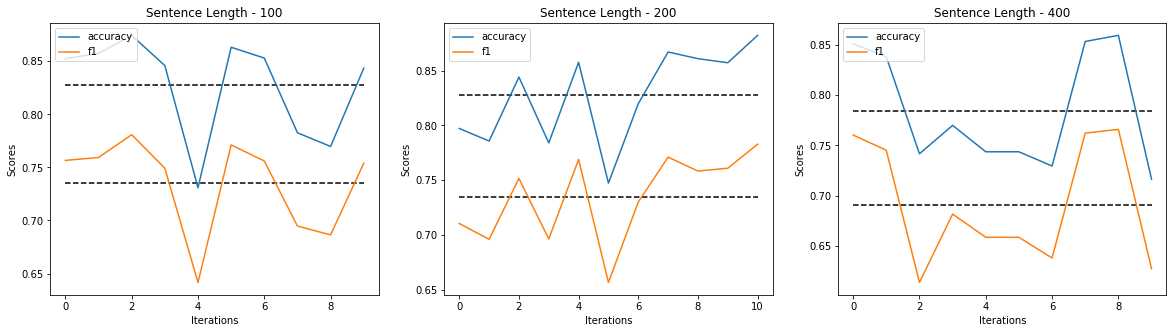

In [12]:
test_acc_1, max_acc_1 = get_raw_100('test_acc')
test_f1s_1, max_f1_1 = get_raw_100('test_f1')

test_acc_2, max_acc_2 = get_raw_200('test_acc')
test_f1s_2, max_f1_2 = get_raw_200('test_f1')

test_acc_4, max_acc_4 = get_raw_400('test_acc')
test_f1s_4, max_f1_4 = get_raw_400('test_f1')

draw_line_graph_acc_f1(max_acc_1, max_f1_1, 'Sentence Length - 100',
                       max_acc_2, max_f1_2, 'Sentence Length - 200',
                       max_acc_4, max_f1_4, 'Sentence Length - 400', 
                       'Scores', 'Iterations')

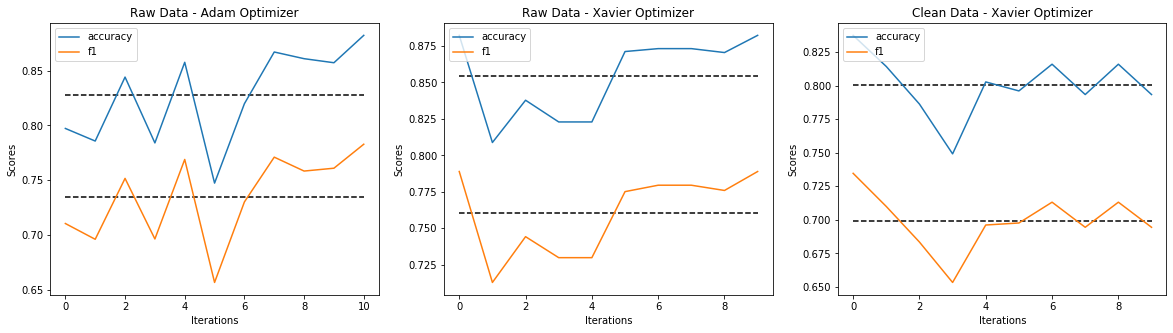

In [5]:
test_acc_r, max_acc_r = get_raw_200('test_acc')
test_f1s_r, max_f1_r = get_raw_200('test_f1')

test_acc_x, max_acc_x = get_raw_200_xavier('test_acc')
test_f1s_x, max_f1_x = get_raw_200_xavier('test_f1')

test_acc_c, max_acc_c = get_raw_200_clean('test_acc')
test_f1s_c, max_f1_c = get_raw_200_clean('test_f1')

draw_line_graph_acc_f1(max_acc_r, max_f1_r, 'Raw Data - Adam Optimizer',
                       max_acc_x, max_f1_x, 'Raw Data - Xavier Optimizer',
                       max_acc_c, max_f1_c, 'Clean Data - Xavier Optimizer', 
                       'Scores', 'Iterations')
#draw_boxplot(test_accuracies, 'Test Accuracy (Raw data - Review Length 200)')

In [10]:
def draw_line_graph_acc_loss_f1(acc, loss, prec, recal, f1, ylabel, xlabel):
    plt.clf()
    #df = pd.DataFrame(data=data)
    #print(df.T)
    plt.rcParams['figure.figsize'] = [20, 5]

    plt.subplot(131)
    
    plt.plot(acc)
    plt.plot(loss)
    plt.title('Loss-Accuracy')
    plt.legend(['accuracy', 'loss'], loc='upper left')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    plt.subplot(132)
    
    plt.plot(f1)
    plt.title('F1')
    plt.legend(['f1'], loc='upper left')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    plt.subplot(133)
    
    plt.plot(prec)
    plt.plot(recal)
    
    plt.title('Precision-Recall')
    
    plt.legend(['precision', 'recall'], loc='upper left')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)    
    
    plt.show()

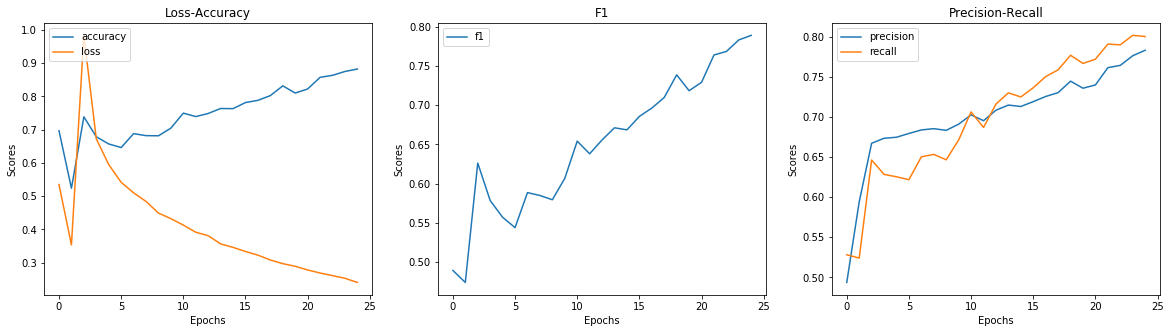

In [11]:

test_accuracies, test_max_acc = get_raw_200_xavier_max('test_acc')
train_loss, train_loss_max = get_raw_200_xavier_max('loss')
train_f1, train_f1_max = get_raw_200_xavier_max('test_f1')
train_prec, train_prec_max = get_raw_200_xavier_max('test_prec')
train_recall, train_recall_max = get_raw_200_xavier_max('test_recall')

train_loss[0] = [x / 10 for x in train_loss[0]]

draw_line_graph_acc_loss_f1(test_accuracies[0], train_loss[0], train_prec[0], train_recall[0], 
                            train_f1[0], 'Scores', 'Epochs')

### Unsuccessful Experiments

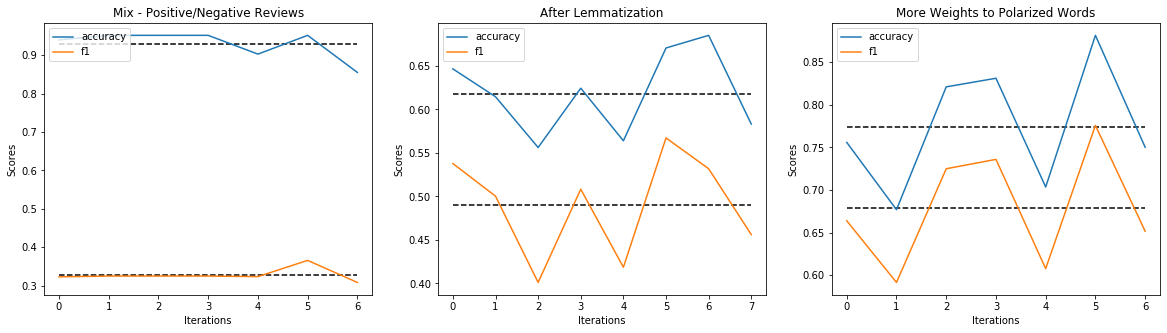

In [9]:
test_acc_m, max_acc_m = get_mix_200('test_acc')
test_f1s_m, max_f1_m = get_mix_200('test_f1')

test_acc_x, max_acc_x = get_lemma_200('test_acc')
test_f1s_x, max_f1_x = get_lemma_200('test_f1')

test_acc_p, max_acc_p = get_polarity_200('test_acc')
test_f1s_p, max_f1_p = get_polarity_200('test_f1')

draw_line_graph_acc_f1(max_acc_m, max_f1_m, 'Mix - Positive/Negative Reviews',
                       max_acc_x, max_f1_x, 'After Lemmatization',
                       max_acc_p, max_f1_p, 'More Weights to Polarized Words', 
                       'Scores', 'Iterations')

In [ ]:
#run with the dev data
#remove lemma